# Probability and Statistics for Data Science

* Solve basic problems of reasoning under uncertainty
* Uncertainty is all around us
* Probability and Statistics provide a rational way to deal with uncertainty

### What is Probability theory?
* Probability theory is a mathematical framework for computing the probability of complex events
    * Under the assumption the we know the probabilities of the basic events

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## A simple (?) question
We all know that if one flips a fair coin then the outcome is "heads" or "tails" with equal probabilities

What does that mean? 

It means that if we flip the coin $k$ times, for some large value of $k$, say $k=10,000$, then the number of "heads" is **about** $\frac{k}{2}=\frac{10,000}{2} = 5,000$ 

What do we mean by **about** ??

## Simulating coin flips

We will use the pseudo random number generators in `numpy` to simulate the coin flips. Instead of "Heads" and "Tails" we will use $x_i=1$ or $x_i=-1$ and consider the sum $S_{10000} = x_1+x_2+\cdots+x_{10000}$.

* If the number of heads is about 5,000 then $S_{10000}\approx 0$
* We will vary the number of coin flips, which we denote by $k$

In [2]:
# generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    X=2*(random.rand(k,n)>0.5)-1   # generate a kXn matrix of +-1 random numbers
    S=sum(X,axis=0)
    return S

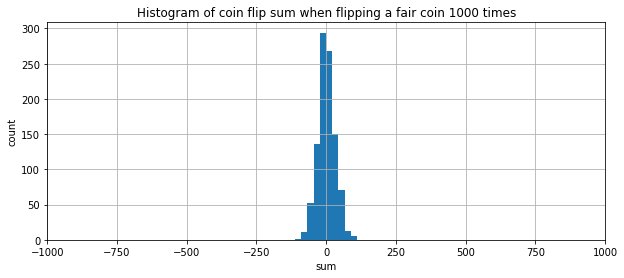

In [3]:
k=1000
n=1000
counts=generate_counts(k=k,n=n)
figure(figsize=[10,4])
hist(counts);
xlim([-k,k])
xlabel("sum")
ylabel("count")
title("Histogram of coin flip sum when flipping a fair coin %d times"%k)
grid()

Note that the sum $S_{1000}$ is not **exactly** $0$, it is only **close to** $0$.

Using **probability theory** we can calculate **how small** is $\big|S_k\big|$

In a later lesson we will show that the probability that $$\big| S_k \big| \geq 4\sqrt{k}$$ is smaller than $2 \times 10^{-8}$ which is $0.000002\%$

Let's use our simulation to demonstrate that this is the case:

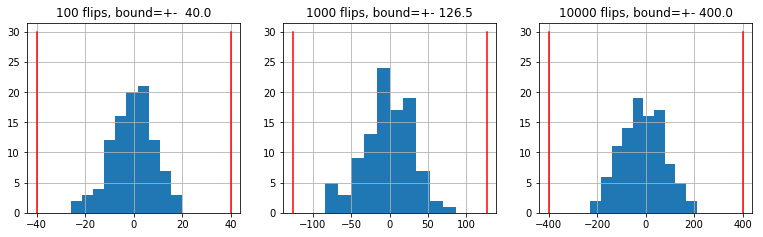

In [4]:
from math import sqrt
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))

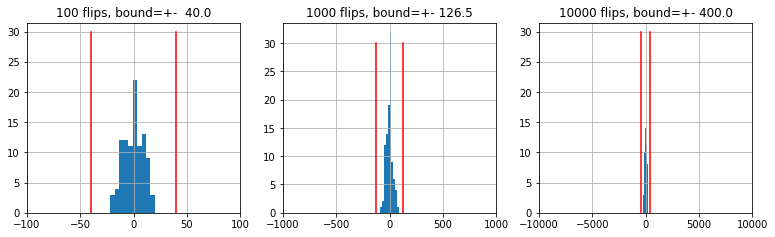

In [5]:
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    xlim([-k,k])
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))

#### Summary
We did some experiments summing $k$ random numbers: $S_k=x_1+x_2+\cdots+x_k$

$x_i=-1$ with probability $1/2$, $x_i=+1$ with probability $1/2$

Our experiments show that the sum $S_k$ is (almost) always in the range $\big[-4\sqrt{k},+4\sqrt{k}\big]$ 

$$\mbox{ If } k \to \infty,\;\;\; \frac{4 \sqrt{k}}{k} = \frac{4}{\sqrt{k}} \to 0$$

$$ \mbox{Therefor if }\;\;k \to \infty,  \frac{S_k}{k} \to 0$$

In most cases, we can **approximate** probabilities using simulations (Monte-Carlo simulations)

Calculating the probabilities is better because:
* It provides a precise answer
* It is much faster than Monte Carlo simulations.

## What is statistics?
Probability theory computes probabilities of complex events given the underlying base probabilities.

Statistics takes us in the opposite direction.

We are given **data** that was generated by a **Stochastic process**

We **infer** properties of the underlying base probabilities.

### Example:  deciding whether a coin is biased.
Previously we've seen the distribution of the number of heads when flipping a fair coin many times.

Let's turn the question around: we flip a coin 1000 times and get 570 heads. 

We **infer** properties of the underlying base probabilities.

Can we conclude that the coin is biased (not fair)?

What can we conclude if we got 507 heads?

#### The Logic of Statistical inference
The answer uses the following logic.
* Suppose that the coin is fair. 
* Use **probability theory** to compute the probability of getting at least 570 (or 507) heads.
* If this probability is very small, then we can **reject** <font color='red'>with confidence</font> the hypothesis that the coin is fair.


#### Calculating the answer
Recall the simulations we did in the video "What is probability".

We used $x_i=-1$ for tails and $x_i=+1$ for heads.

We looked at the sum $S_k=\sum_{i=1}^k x_i$, here $k=1000$.

If number of heads is $570$ then $S_{1000} = 570-430 = 140$  

It is very unlikely that $|S_{1000}| > 4\sqrt{k} \approx 126.5$

In [6]:
4*sqrt(1000)

126.49110640673517

It is very unlikely that the coin is unbiased.

### What about 507 heads?

507 heads = 493 tails $ \Rightarrow S_n = 14$,       $\;\;\;14 \ll 126.5$

We cannot conclude that coin is biased.

#### Conclusion
The probability that an unbiased coin would generate a sequence with 570 or more heads is extremely small. From which we can conclude, <font color='red'>with high confidence</font>, that the coin **is** biased.

On the other hand, $\big| S_{1000} \big | \geq 507$ is quite likely. So getting 507 heads does not provide evidence that the coin is biased.

### Real-World examples
You might ask "why should I care whether a coin is biased?"
* This is a valid critique. 
* We will give a few real-world cases in which we want to know whether a "coin" is biased or not.
* We could try and ask **all** potential voters.
* That would be very expensive.
* Instead, we can use a poll: call up a small randomly selected set of people.
* Call $n$ people at random and count the number of **D** votes.
* Can you say <font color='red'>with confidence</font> that there are more **D** votes, or more **R** votes?
* Mathematically equivalent to flipping a biased coin and asking whether you can say <font color='red'>with confidence</font> that it is biased towards "Heads" or towards "Tails"

#### Case 2: A/B testing
A common practice when optimizing a web page is to perform A/B tests.
* A/B refer to two alternative designs for the page.

![AB](images/AB.png)

* To see which design users prefer we randomly present design A or design B.
* We measure how long the user stayed on a page, or whether the user clicked on an advertisement.
* We want to decide, <font color='red'>with confidence</font>, which of the two designs is better.
* Again: similar to making a decision <font color='red'>with confidence</font> on whether "Heads" is more probably than "Tails" or vice versa.


### Summary
Statistics is about analyzing real-world data and drawing conclusions.

Examples include:

* Using polls to estimate public opinion.
* performing A/B tests to design web pages
* Estimating the rate of global warming.
* Deciding whether a medical procedure is effective

***
## The Three Card Problem
***

Suppose we have three cards in a hat:

* <span style="color:red">**R**</span><span style="color:blue">**B**</span> - One card is painted <span style="color:blue">blue</span> on one side and <span style="color:red">red</span> on the other.

* <span style="color:blue">**BB**</span> - One card is painted <span style="color:blue">blue</span> on both sides.

* <span style="color:red">**RR**</span> - One card is painted <span style="color:red">red</span> on both sides.

#### The setup
* I pick one of the three cards at random, flip it to a random side, and place it on the table.
* $U$ be the color of the side of the card facing up. (<span style="color:blue">**B**</span> or <span style="color:red">**R**</span>)


#### Do you want to bet?
* If the other side of the card has a different I pay you \$1, 
* If the other side has the same color you pay me \$1.

#### Why is this a fair bet ?
* Suppose $U$ is <span style="color:red">**R**</span>. 
* Then the card is either <span style="color:red">**RR**</span> or <span style="color:red">**R**</span><span style="color:blue">**B**</span>.
* Therefore the other side can be either  <span style="color:red">**R**</span> or <span style="color:blue">**B**</span>
* Therefore in this case the odds are equal.
* A similar argument holds for the case where $U$ is <span style="color:blue">**B**</span>

#### Lets use a monte-carlo simulation
The code below selects one of the three cards at random and selects a random side to be "up".

It then prints the card and indicates if the two sides have the same or different colors.

In [7]:
red_bck="\x1b[41m%s\x1b[0m"
blue_bck="\x1b[44m%s\x1b[0m"
red=red_bck%'R'
blue=blue_bck%'B'
Cards=[(red,blue),(red,red),(blue,blue)]
counts={'same':0,'different':0}
from random import random
for j in range(100):
    i=int(random()*3.)  # Select a random card
    side=int(random()*2.)
    C=Cards[i]
    if(side==1):        # select which side to be "up"
        C=(C[1],C[0])
    same= 'same' if C[0]==C[1] else 'different'  # count the number of times the two sides are the same or different.
    counts[same]+=1
    print ''.join(C)+' %-9s'%same,
    if (j+1)%5==0:
        print
print
print counts

RR same      RR same      BB same      BB same      RB different
BB same      RR same      BB same      RB different BB same     
BR different BB same      BB same      RB different RR same     
BB same      BB same      RR same      BR different BB same     
BB same      BB same      BB same      RR same      BB same     
BB same      RR same      RB different RR same      RR same     
RR same      RR same      RR same      RR same      RR same     
BR different RB different RR same      BB same      RR same     
RR same      RR same      RR same      RB different RR same     
RR same      BR different RB different RR same      BR different
BB same      BB same      RR same      RB different BB same     
BR different RR same      BB same      RR same      RB different
BR different BB same      BB same      BB same      RR same     
RR same      BB same      RB different RB different RR same     
BR different RB different BB same      BB same      RR same     
RB different RR same     

#### The simulation does not agree with the argument
* In Simulation: the two sides have the same color about **twice** the number of times that they have different color.
* you are twice as likely to lose as you are to win.
* On average you lose 33 cents per iteration:  
$\$1\times(2/3)-\$1\times(1/3)$

#### Alternative argument
If we pick a card at random 2/3 of the time we pick a card where the two sides have the same color, and only 1/3 where the color is different.

#### How can we be sure?
* The original argument also sounds convincing, but is wrong.
* To be sure that our argument is correct, we need to define some concepts, including **outcome** and **event**. Which we will do next week.

***
## Long Term Frequencies
***

In [8]:
#Create list of color symbols
red_bck="\x1b[41m%s\x1b[0m"
green_bck="\x1b[42m%s\x1b[0m"
tan_bck="\x1b[43m%s\x1b[0m"
blue_bck="\x1b[44m%s\x1b[0m"
sym=[red_bck%'6',green_bck%'1',tan_bck%'3',blue_bck%'4']
print(sym[0],sym[1],sym[2],sym[3])

('\x1b6\x1b', '\x1b1\x1b', '\x1b3\x1b', '\x1b4\x1b')


* The probability that a knucklebone lands on a narrow face is smaller then it lands on a wide face.
* Each knucklebone is different, therefore the probabilities are different.
* Suppose we have P(6)=0.1, P(1)=0.2, P(3)=0.3, P(4)=0.4

In [9]:
p=[0.0,0.1,0.2,0.3,0.4]
c=cumsum(p)
for i in range(4):
    print('symbol=%s, probability=%5.3f'%(sym[i],p[i]))

symbol=6, probability=0.000
symbol=1, probability=0.100
symbol=3, probability=0.200
symbol=4, probability=0.300


In [10]:
def rand2sym(vec):
    """ Transform an array of random numbers, distributed uniformly in [0,1]
    into a sequence of symbols, chosen according to the probabilities defined by c (cumul of p)"""
    ans=[]
    counts={i:0 for i in range(4)}
    for x in vec:
        for i in range(len(c)-1):
            if x>=c[i] and x<c[i+1]:
                ans.append(sym[i])
                counts[i]+=1
                break
    return ans,counts

#### Flip 1000 times:

In [11]:
n=1000
R=np.random.rand(n)
_syms,counts=rand2sym(R)
print(''.join(_syms))
#print counts
f=[float(y)/n for x,y in counts.items()]
print
#print 'number of trials (n)=',n
for i in range(4):
    print( '%s probability=%3.2f frequency= %d/%d = %3.2f '%(sym[i],p[i+1],counts.items()[i][1],n,f[i]) )

4613446161341341334431413146446133336436414133643636111614134443143133313141414631433113134614644611611144444333431443644643314131163341163163131641464433333344463411363331443134114443431633336344436331146364444644343413664334333416433346114114434431463114643443416433334133364161141343341343344414634314334133443134341463111444644446314113431343463433433433141316134441314331441333334443131411431431133446343444444644334334113133143333111434341343413441463641466441341316631433444433434313316346144446463441644143413144413414443431313344136344111433414146433613463341344341314416643441143341433434361313443144344643111344163331413441443434441441314631341134413143443346143443141111343316464334461434444343341463443444144111341334446431364441133613414413133331443143443344343434411143344341164641316344343346443643411434441341443431333464444446344444413444334433316664341334643136166313346433464643113664334314333436364333341143633363344441443334436444643644431134414443434131333444443633113444161346

## Place where Statistics can be useful:

### Stopping a game in the middle

* Simplified version of problem in famous letter from Pascal to Fermat in 16554
* Suppose a card game of pure chance is played until one side wins
* Both players put 1 dollar
* The winner takes 2 dolars
* suppose the game is stopped before either side wins
* How should the 2 dollars be split?
* What is the probability that player 1 will win given the cards currently held?

### The frequentist point of view

* To assign a probability to the outcomes of a game/experiment is the same as saying that if we repeat the game many times, the long term frequencies of the outcomes converge to the probabilities.
* Provides a solid foundation on which probability theory is built.
* Makes sense in games and other situations where on can repeat the same choice many times.

### Situations where repetition is hard
1. A meteorologist says that the probability of rain tomorrow is 10%
    * Wht does that mean?
    * It will either rain or not rain
    * Tomorrow only happens once
2. Suppose a surgeon says there is a 2% chance of complications with a particular surgery
    * It might mean that 2% of the patients develop complications due to durgery
    * What does it mean for you?
    * Maybe mos of the complication where with patients older than 90 (and you are 35)
    
### The colloquial meaning of probability
* The word "probable" was in use before 1650. But it's meaning was not quantitative
* Even today the words "probable" and "probably" have common use meanings that is qualitative, not quantitative

### Combining evidence
* Central to many fields: Medicine, economics, investment, Law, Science, technology...
* Typically, you don't repeat an experiment many times.
* the math used is probability theory, but much of the discussion is not mathematical.
* A popular approach: Baysian Statistics

## Exercises:

In this excercise you will write code to estimate the probability that $n$ flips of a fair coin will result in number of `"heads"` between $k_1$ and $k_2$.

You should write the body of two functions:
1. <code><font color="blue">seq_sum</font>(n)</code>: generates a random sequence of coin flips and counts the number of heads.
2. <code><font color="blue">estimate_prob</font>(n,k1,k2,m)</code>: Using calls to `seq_sum`, estimate the probability of the number of heads being between $k_1$ and $k_2$. 


##  Exercise 1:

Write a function, <code><font color ="blue">seq_sum</font>(n)</code>, which generates $n$ random coin flips from a fair coin and then returns the number of heads. A fair coin is defined to be a coin where $P($heads$)=\frac{1}{2}$ 

The output type should be a numpy integer, **hint:** use `random.rand()` 

<font  style="color:blue"> * **Code:** *</font>
```python
x = seq_sum(100)
print x
print [seq_sum(2) for x in range(20)]
```


<font  style="color:magenta"> * **Output:** *</font>
```
49
[0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1]
```

In [12]:
def seq_sum(n):
    """ input: n, generate a sequence of n random coin flips
        output: return the number of heads 
    """
    return sum(random.random)

In [13]:
help(random)

Help on built-in function random:

random(...)
    random() -> x in the interval [0, 1).



In [15]:
random.rand(1,2)

AttributeError: 'builtin_function_or_method' object has no attribute 'rand'

***

***

In [16]:
# Set definitiion
Set1 = {1,2}
print(Set1)

set([1, 2])


In [17]:
Set2 = set({2,3})
print(Set2)

set([2, 3])


In [18]:
Empty1=set()
type(Empty1)

set

In [19]:
print(Empty1)

set([])


In [21]:
Empty2=set({})
type(Empty2)

set

In [22]:
print(Empty2)

set([])


In [24]:
NotASet = {}
type(NotASet)

dict

In [25]:
# Membership .... 'in' is the same as belong
Furniture = {'desk','chair'}
'desk' in Furniture

True

In [26]:
'bed' in Furniture

False

In [27]:
# the 'not in' as not belonging
'desk' not in Furniture

False

In [28]:
'bed' not in Furniture

True

In [29]:
# Test if set is empty
S = set()
not S

True

In [30]:
T={1,2}
not T

False

In [31]:
# python 'len' command can be used to test if a set is empty too
print(len(S))

0


In [32]:
print(len(T))

2


In [33]:
print(len(S)==0)

True


### Basic Sets

Specify a set owithin a universe, or any other set
$ \{x\in A|...\} = \{\text{elements x in A such that ...} \} = \{x\in A: ...\}$

$ \{x\in \mathcal{R}|x^2\geq 0\} = \mathcal{R}$

$ \{x\in \mathcal{R}|x^2 = 1\} = \{-1,1\} $

$ \{x\in \mathcal{R}|x^2 = 0\} = \{0\} $, a single-element set is a singleton

$ \{x\in \mathcal{R}|x^2 = -1\} = \varnothing $

Integers from m to n, inclusive can be represented as $\{m,...,n\}=\{i\in\mathcal{Z}|m\leq i\leq n\}$

For convinience we will adopte the following convention, $[n]=\{1,...,n\}$

### Divisibility

$m,n \in\mathcal{Z}$, if $n=c\dot m$ for some $c\in\mathcal{Z}$, we say that n is a multiple of m, or m divides n, and write $m|n$

If no such c exists, m doen not divide n, or n is not a multiple of m, denoted $m|n$

### Set of Multiples
$m \in \mathcal{Z}$, $_m\mathcal{Z}\equiv\{i\in\mathcal{Z}: m|i \}$ integer multiples of m

$m\in\mathcal{Z}, n\in\mathcal{P}$, $_m[n]\equiv\{i\in [n]: m|i \}$, multiples of m in {1,...,n}

In [34]:
print(set(range(3)))

set([0, 1, 2])


In [35]:
print(set(range(2,5)))

set([2, 3, 4])


In [37]:
print(set(range(2,12,3)))

set([8, 2, 11, 5])


### Venn Diagrams

<matplotlib_venn._common.VennDiagram instance at 0x7fce85aab1b8>

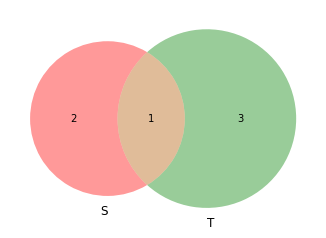

In [40]:
import matplotlib_venn as venn
S = {1,2,3}
T = {0,2,-1,5}
venn.venn2([S,T], set_labels=('S','T'))

Sets A and B are equal, denoted $A=B$, if they have exactly the same elements.

Two sets intersect if they share at least one common element, $\exists x, x\in A$ and $x\in B$.

Two sets are disjoint if they share no elements, $\neg\exists x, x\in A$ and $x\in B$.

* $\emptyset$ disjoint from any set
* Non-empty $\Omega$ intersects every set
* A set intersects itself iff it is a non-empty

### Subsets

If every element in A is also in B, then A is a subset of B, denoted $A\subseteq B$.

Equivalently, B is a superset of, or contains, A, denoted $B\supseteq A$.

If A has an element that's not in B, then A is not a subset of B, denoted $A\nsubseteq B$, or $B\nsupseteq A$.

In [41]:
S1 = {0,1}
S2 = set({0,1})
S3 = {1,0,1}
T  = {0,2} 

### Equality

In [42]:
S1==T

False

In [43]:
S1==S2

True

In [44]:
S1==S3

True

### Inequality

In [45]:
S1 != S2

False

In [46]:
S1 != T

True

### Disjoint

In [47]:
S1.isdisjoint(T)

False

In [48]:
S1.isdisjoint({2})

True

### Subsets and supersets

In [49]:
zero={0}
zplus={0,1}
zminus={0,-1}

$\subseteq$: <= or issubset

In [50]:
# <= or issubset
zminus <= zplus

False

In [51]:
zminus.issubset(zero)

False

$\subset$: <

In [52]:
zplus < zminus

False

In [53]:
zero < zminus

True

$\supseteq$: >= or issuperset

In [54]:
zplus >= zminus

False

In [55]:
zplus.issuperset(zero)

True

$\supset$: >

In [56]:
zminus > zminus

False

In [57]:
zplus > zero

True